# 파이토치로 선형 회귀 구현하기

### - First, 선형 회귀 is 학습 데이터와 가장 잘 맞는 하나의 직선

## 1. Data Definition

##### (1) training dataset - 예측을 위해 사용하는 데이터 셋

##### (2) test dataset - 학습이 끝난 후, 모델이 얼마나 잘 작동하는지 판별하는 데이터 셋

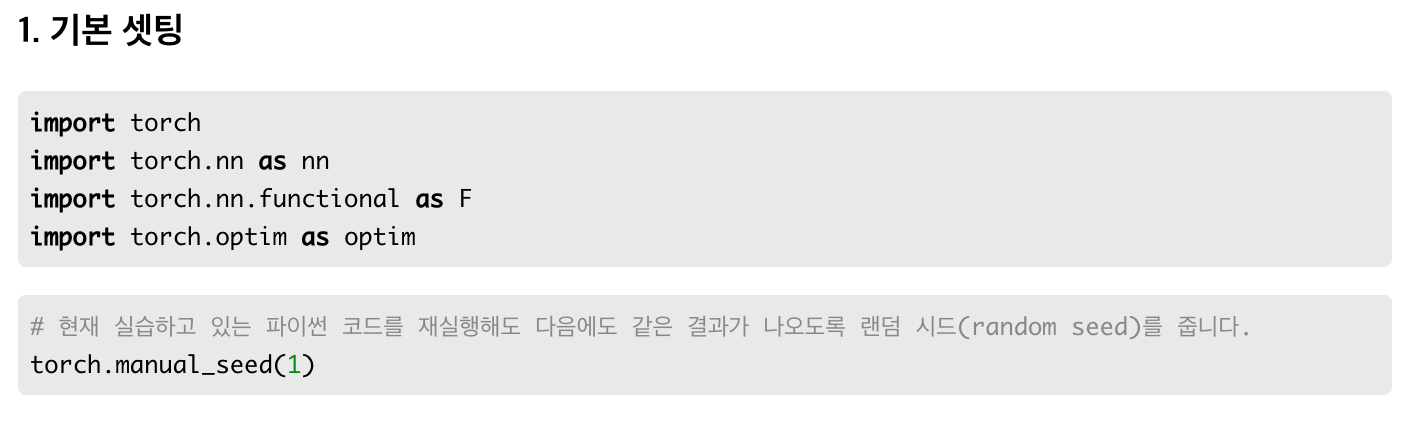

In [206]:
Image("library.png",width=750,height=300)

torch.manuel_seed를 사용하는 이유는?
- 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있음. 

In [241]:
import torch 

for i in range(1,3):
  print(torch.rand(1))

tensor([0.6387])
tensor([0.5247])


In [243]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


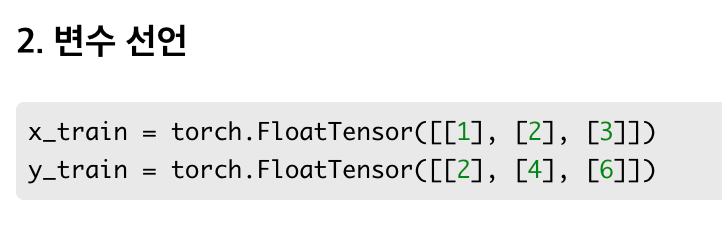

In [210]:
Image("data.png",width=400,height=300)

## 2. Hypothesis 

##### (1) y = Wx + b
##### (2) H(x) = Wx + b

##### (3) W를 가중치(Weight), b를 편향(bias)

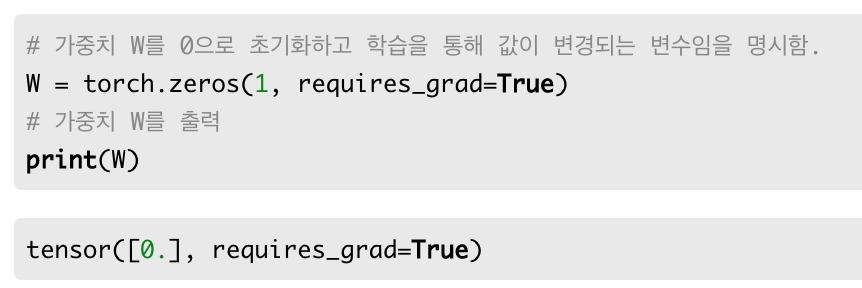

In [226]:
Image("W.png",width=470,height=300)
W를 0으로 초기화하고, requires_grad=True를 통해 학습을 통해 계속 값이 변경되는 변수의 의미

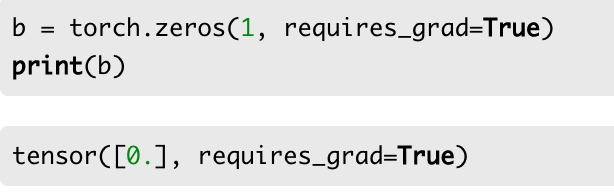

In [232]:
Image("b.png",width=370,height=300)
binary 역시 같이

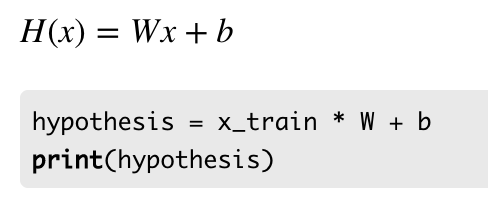

In [216]:
Image("hypothesis.png",width=300,height=300)

## 3. Compute loss

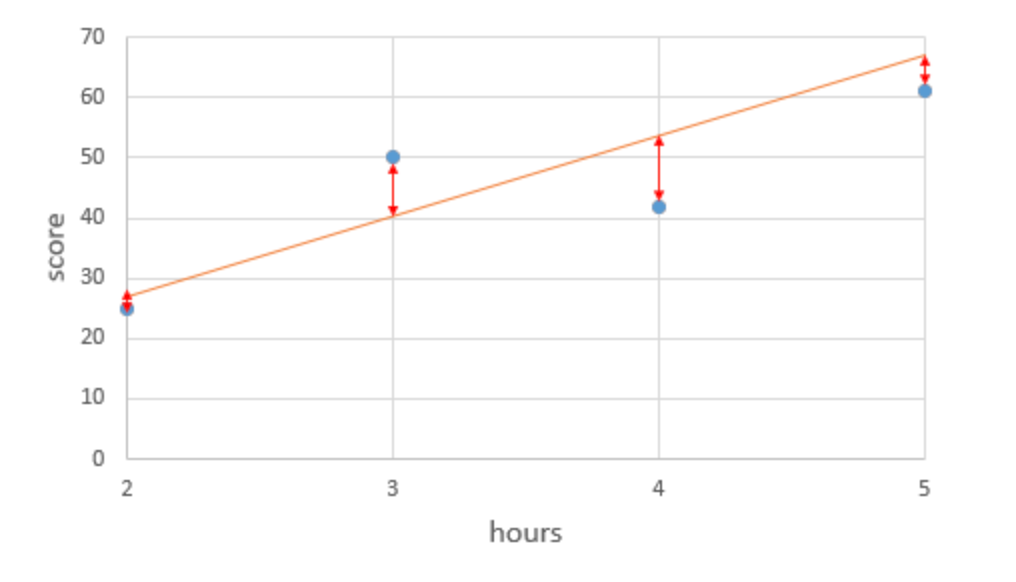

In [181]:
Image("computeloss.png",width=450,height=300)

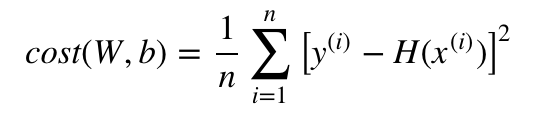

In [187]:
Image("formula.png",width=350,height=300)
오차 = (실제값 - 예측값)^2 / n
평균 제곱 오차 - 적절한 W와 b를 찾는 이유는? W와 b가 평균 제곱 오차의 값을 최소로 만들기 때문에

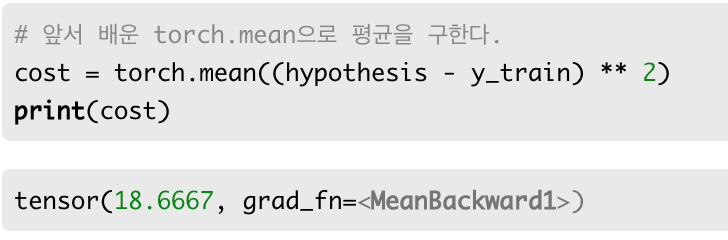

In [229]:
Image("mse.png",width=400,height=300)

## 4. Optimizer (Gradient Descent)

##### 최적화  알고리즘 - 옵티마이저 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 학습(training)이라고 한다.

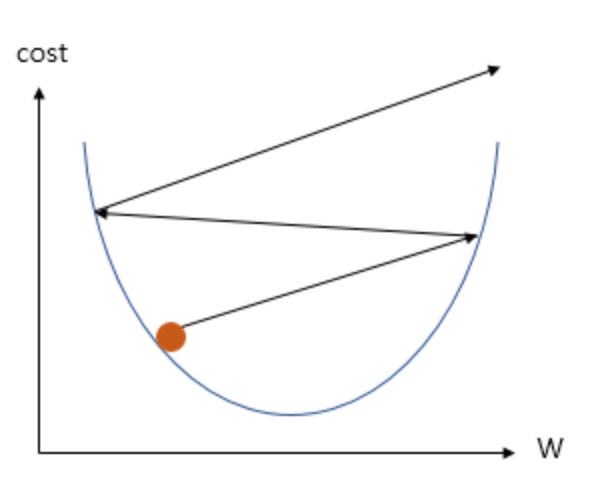

In [192]:
Image("Gdgraph.png",width=350,height=300)
cost가 최소화 되는 지점 - 기울기 0

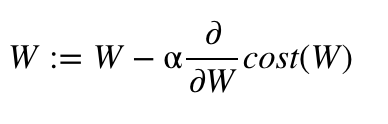

In [195]:
Image("GD.png",width=250,height=300)

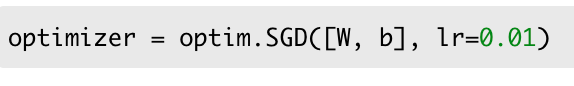

In [228]:
Image("optim.png",width=350,height=300)

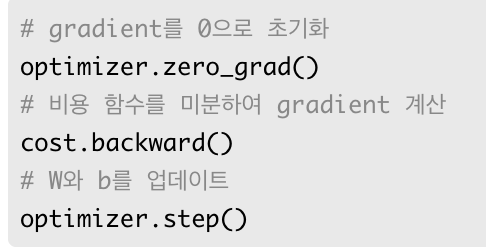

In [227]:
Image("train.png",width=300,height=300)
optimization.zero_grad()가 필요한 이유
ㄴ 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적 시키는 특징

In [ ]:
cost.backward() - 가중치 W와 편향 b에 대한 기울기 계산
optimizer.step() - 변수들의 기울기에 학습률을 곱하여 빼줌으로서 업데이트

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

In [11]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))


Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

# nn.Module로 구현하는 선형 회귀

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [62]:
torch.manual_seed(1)

In [63]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [64]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

In [66]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [67]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [68]:
new_var =  torch.FloatTensor([[4.0]]) 

pred_y = model(new_var) # forward 연산

print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)


### y = 2x이므로 y값이 8에 가까워 어느정도 최적화가 됨

# Numpy set to Tensor + Class활용 + 시각화

Epoch    0/200 Cost: 10.755816
Epoch   10/200 Cost: 0.172450
Epoch   20/200 Cost: 0.172273
Epoch   30/200 Cost: 0.172105
Epoch   40/200 Cost: 0.171945
Epoch   50/200 Cost: 0.171793
Epoch   60/200 Cost: 0.171649
Epoch   70/200 Cost: 0.171512
Epoch   80/200 Cost: 0.171382
Epoch   90/200 Cost: 0.171258
Epoch  100/200 Cost: 0.171140
Epoch  110/200 Cost: 0.171029
Epoch  120/200 Cost: 0.170923
Epoch  130/200 Cost: 0.170822
Epoch  140/200 Cost: 0.170727
Epoch  150/200 Cost: 0.170636
Epoch  160/200 Cost: 0.170550
Epoch  170/200 Cost: 0.170468
Epoch  180/200 Cost: 0.170390
Epoch  190/200 Cost: 0.170316
Epoch  200/200 Cost: 0.170246


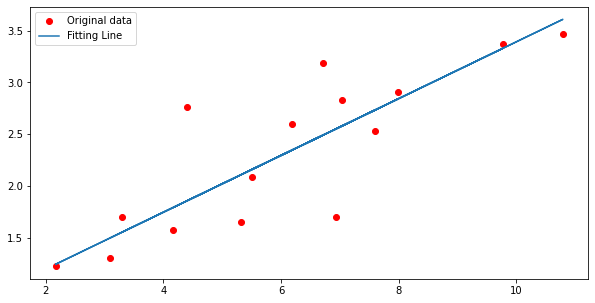

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32) #15x1

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32) #15x1


x_train = torch.from_numpy(x_train) #numpy에서 tensor로 변환

y_train = torch.from_numpy(y_train)


class linearRegression(nn.Module): #torch.nn.Module을 상속 
    def __init__(self):
        super(linearRegression, self).__init__() #여기서 만든 클래스는 nn.Module클래스의 속성들을 가지고 초기화
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out
    
model = linearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 


nb_epochs = 200
for epoch in range(nb_epochs+1):

    
    prediction = model(x_train)

    
    cost = F.mse_loss(prediction, y_train) 

    
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step()

    if epoch % 10 == 0:
    # 10번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))



predict = model(x_train)
predict = predict.data.numpy()
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')

plt.legend() 
plt.show()